In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
import subprocess

root_dir = "bahan_skripsi_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
command = f'mkdir {root_dir}'

subprocess.run(command, shell=True)

CompletedProcess(args='mkdir bahan_skripsi_20240627-071830', returncode=0)

# **Klasifikasi gizi anak balita dengan metode Neural Network pada ......**

In [ ]:
import os
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from keras.models import load_model
from keras.utils import plot_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorboard.plugins.hparams import api as hp

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/dataset/data_balita_fix.csv')
data_posyandu_rambutan = pd.read_excel("/content/drive/MyDrive/SKRIPSI/dataset/data_posyandu/data_balita_posyandu_rambutan_februari_2023_fix.xlsx")

In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,1
1,0,laki-laki,56.705203,3
2,0,laki-laki,46.863358,2
3,0,laki-laki,47.508026,2
4,0,laki-laki,42.743494,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120373 entries, 0 to 120372
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120373 non-null  int64  
 1   Jenis Kelamin      120373 non-null  object 
 2   Tinggi Badan (cm)  120373 non-null  float64
 3   Status Gizi        120373 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.7+ MB


In [ ]:
data_posyandu_rambutan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       37 non-null     int64  
 1   Jenis Kelamin      37 non-null     object 
 2   Tinggi Badan (cm)  37 non-null     int64  
 3   Status Gizi        37 non-null     object 
 4   z-score            37 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ KB


In [ ]:
data_posyandu_rambutan['Tinggi Badan (cm)'] = data_posyandu_rambutan['Tinggi Badan (cm)'].astype(float)

In [ ]:
df.shape

(120373, 4)

In [ ]:
df.columns

Index(['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi'], dtype='object')

In [ ]:
df['Status Gizi'].value_counts()

Status Gizi
2    67533
0    19848
3    19558
1    13434
Name: count, dtype: int64

In [ ]:
df['Jenis Kelamin'].value_counts()

Jenis Kelamin
perempuan    60659
laki-laki    59714
Name: count, dtype: int64

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('pe', 'perempuan')

print(df['Jenis Kelamin'].value_counts())

Jenis Kelamin
perempuan    60659
laki-laki    59714
Name: count, dtype: int64


In [ ]:
print(data_posyandu_rambutan['Jenis Kelamin'].value_counts())

Jenis Kelamin
perempuan    23
laki-laki    14
Name: count, dtype: int64


In [ ]:
print(data_posyandu_rambutan['Status Gizi'].value_counts())

Status Gizi
normal              30
stunted              4
severely stunted     3
Name: count, dtype: int64


In [ ]:
status_gizi_mapping = {'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3}
jenis_kelamin_mapping = {'perempuan': 0, 'laki-laki': 1}

# **Merubah Data Object String ke Int**

In [ ]:
# df['Status Gizi'] = df['Status Gizi'].map(status_gizi_mapping)

df['Jenis Kelamin'] = df['Jenis Kelamin'].map(jenis_kelamin_mapping)

df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,1,44.591973,1
1,0,1,56.705203,3
2,0,1,46.863358,2
3,0,1,47.508026,2
4,0,1,42.743494,0
...,...,...,...,...
120368,60,0,100.600000,2
120369,60,0,98.300000,1
120370,60,0,121.300000,2
120371,60,0,112.200000,2


In [ ]:
data_posyandu_rambutan['Status Gizi'] = data_posyandu_rambutan['Status Gizi'].map(status_gizi_mapping)

data_posyandu_rambutan['Jenis Kelamin'] = data_posyandu_rambutan['Jenis Kelamin'].map(jenis_kelamin_mapping)

data_posyandu_rambutan

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,z-score
0,60,1,105.0,2,-1.079005
1,60,1,107.0,2,-0.647403
2,60,1,115.0,2,1.079005
3,60,0,102.0,2,-1.555733
4,49,0,89.0,0,-3.290685
5,49,1,96.0,2,-1.866994
6,49,0,106.0,2,0.621318
7,48,0,99.0,2,-0.858967
8,49,0,105.0,2,0.391200
9,46,0,100.0,2,-0.354786


In [ ]:
df.describe()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
count,120373.000000,120373.000000,120373.000000,120373.000000
mean,30.184585,0.496075,88.670140,1.721100
std,17.581472,0.499987,17.303344,0.925123
min,0.000000,0.000000,40.010437,0.000000
25%,15.000000,0.000000,77.000000,1.000000
50%,30.000000,0.000000,89.800000,2.000000
75%,45.000000,1.000000,101.200000,2.000000
max,60.000000,1.000000,128.000000,3.000000


In [ ]:
data_posyandu_rambutan.describe()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,z-score
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,31.918919,0.378378,86.756757,1.729730,-0.875312
std,18.151184,0.491672,16.374787,0.607758,1.289745
min,0.000000,0.000000,51.000000,0.000000,-3.617064
25%,17.000000,0.000000,74.000000,2.000000,-1.639283
50%,33.000000,0.000000,91.000000,2.000000,-0.901957
75%,46.000000,1.000000,100.000000,2.000000,0.105300
max,60.000000,1.000000,115.000000,2.000000,1.648168


In [ ]:
data_posyandu_rambutan.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,z-score
0,60,1,105.0,2,-1.079005
1,60,1,107.0,2,-0.647403
2,60,1,115.0,2,1.079005
3,60,0,102.0,2,-1.555733
4,49,0,89.0,0,-3.290685


In [ ]:
data_posyandu_rambutan.drop(columns='z-score', axis=1, inplace=True)

In [ ]:
df_merged = pd.concat([df, data_posyandu_rambutan], ignore_index=True, sort=False)

In [ ]:
df_merged

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,1,44.591973,1
1,0,1,56.705203,3
2,0,1,46.863358,2
3,0,1,47.508026,2
4,0,1,42.743494,0
...,...,...,...,...
120405,5,1,67.000000,2
120406,5,0,62.000000,2
120407,3,1,56.000000,1
120408,1,1,54.000000,2


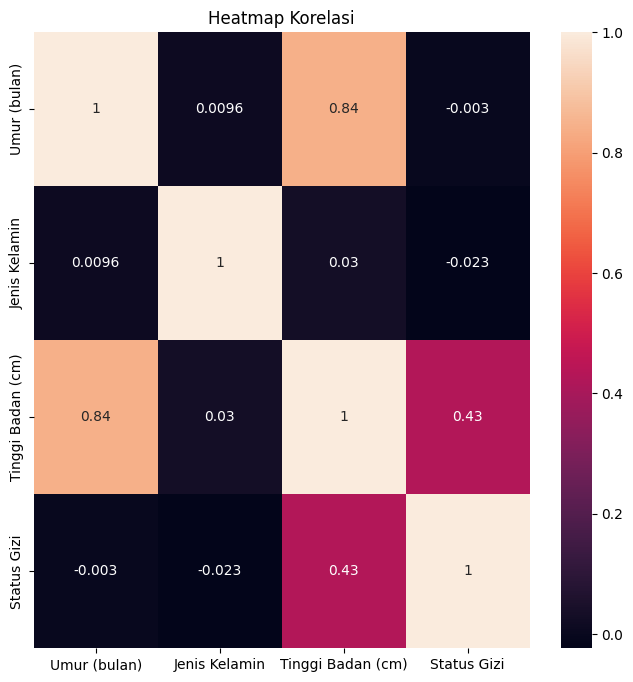

In [ ]:
plt.figure(figsize=(8,8))

sns.heatmap(df_merged.corr(), annot=True)
plt.title('Heatmap Korelasi')
plt.show()

# Scatter plot dan regresi kolom umur dan tinggi badan

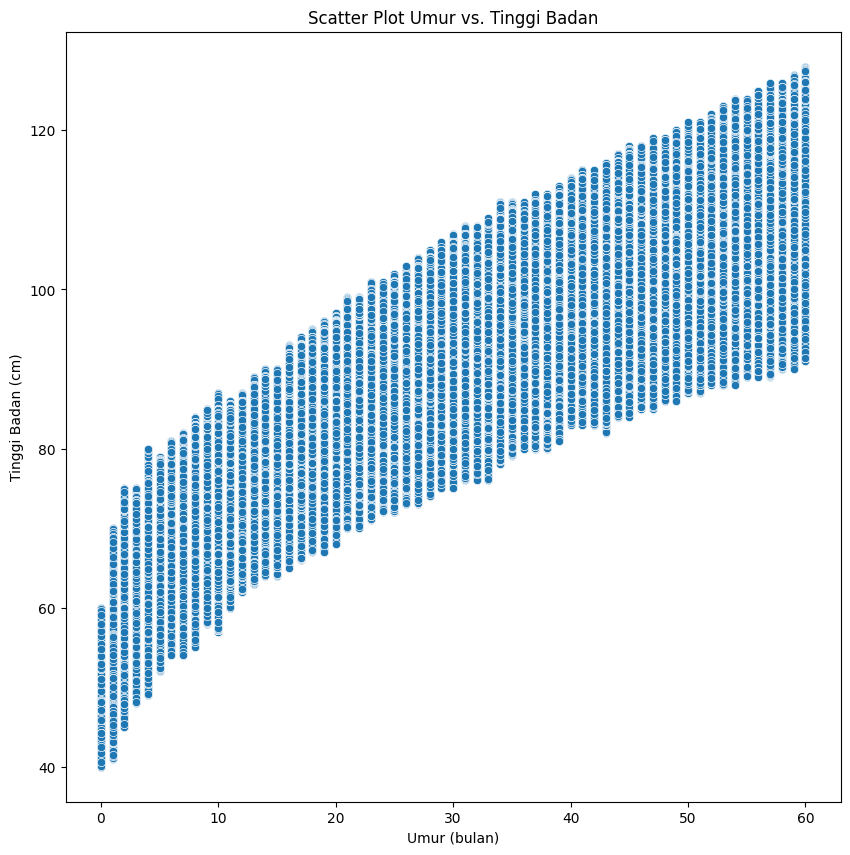

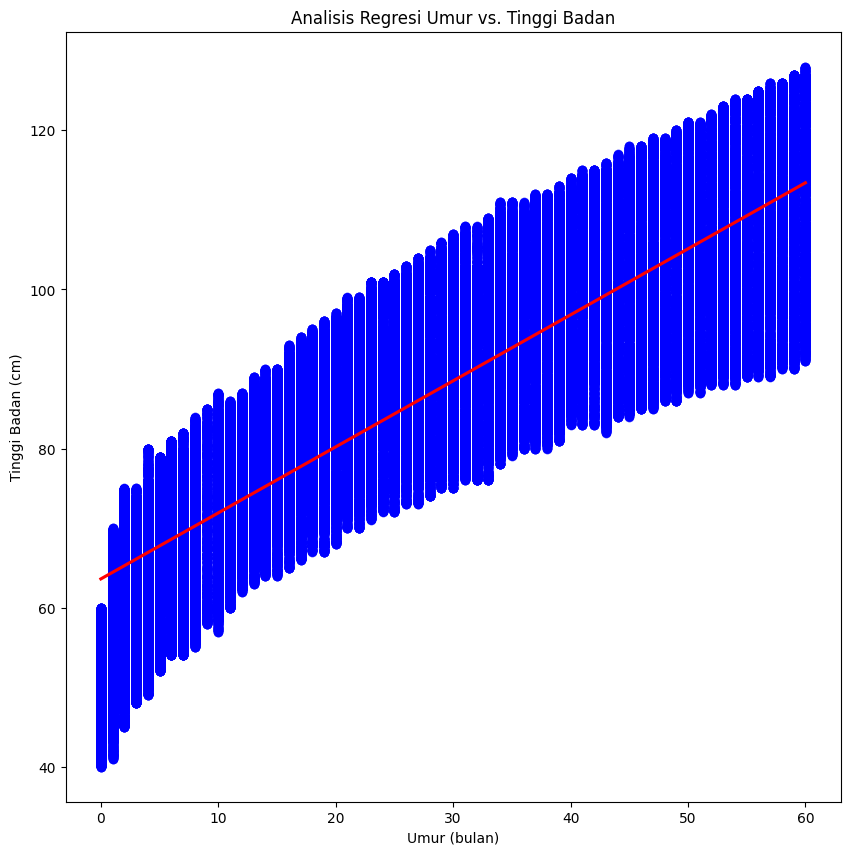

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Umur (bulan)', y='Tinggi Badan (cm)', data=df_merged)
plt.title('Scatter Plot Umur vs. Tinggi Badan')
plt.show()

plt.figure(figsize=(10,10))
sns.regplot(x='Umur (bulan)', y='Tinggi Badan (cm)', data=df_merged, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Analisis Regresi Umur vs. Tinggi Badan')
plt.show()

# Analisis Grup atau Kategori

<Figure size 1500x1500 with 0 Axes>

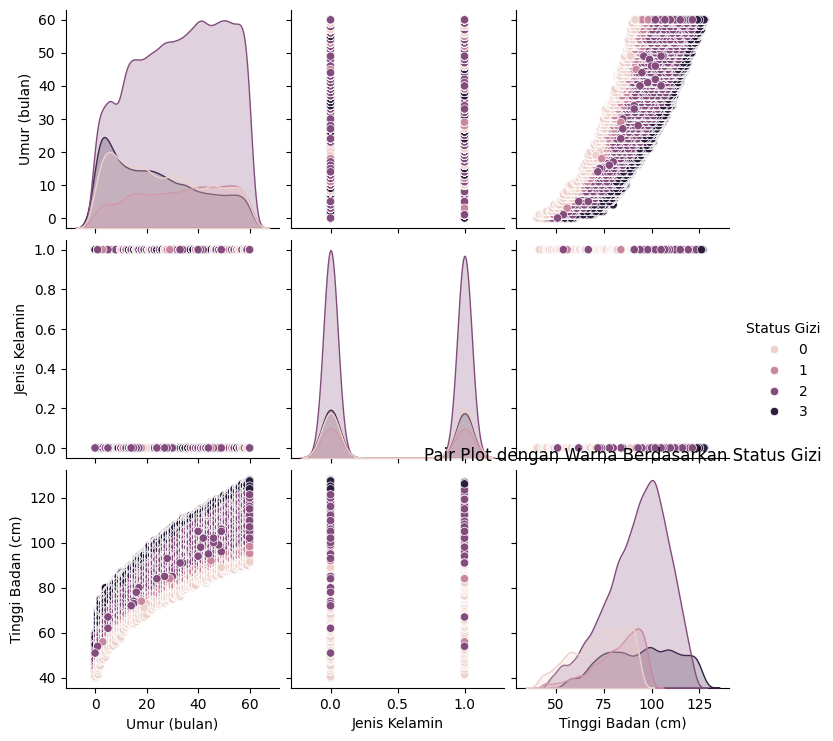

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(df_merged, hue='Status Gizi')
plt.title('Pair Plot dengan Warna Berdasarkan Status Gizi')
plt.show()

# Analisis Outlier

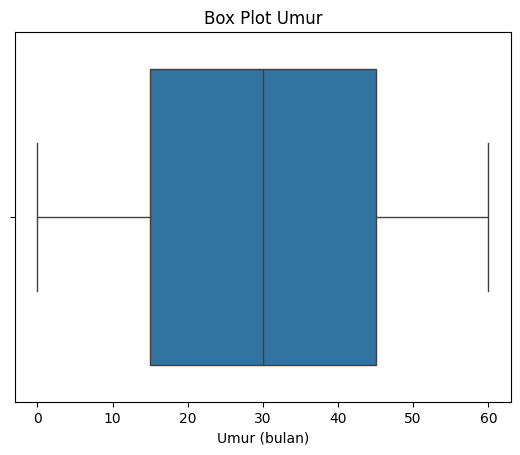

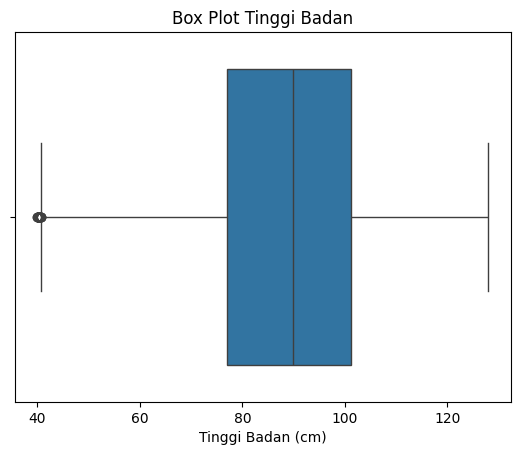

In [ ]:
sns.boxplot(x='Umur (bulan)', data=df_merged)
plt.title('Box Plot Umur')
plt.show()

sns.boxplot(x='Tinggi Badan (cm)', data=df_merged)
plt.title('Box Plot Tinggi Badan')
plt.show()

# Histogram plot Umur (Bulan)

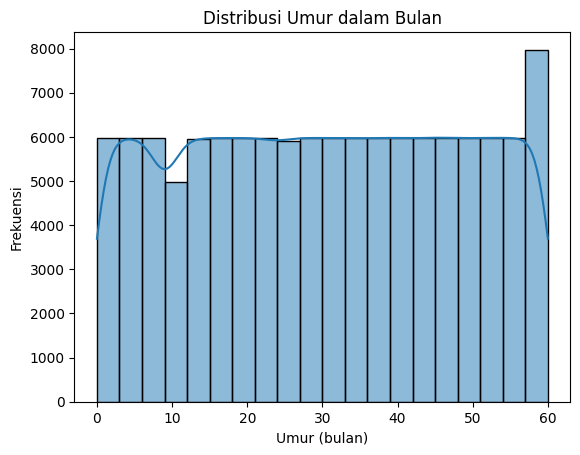

In [ ]:
sns.histplot(df_merged['Umur (bulan)'], bins=20, kde=True)
plt.xlabel('Umur (bulan)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Umur dalam Bulan')
plt.show()

# Pair Plot

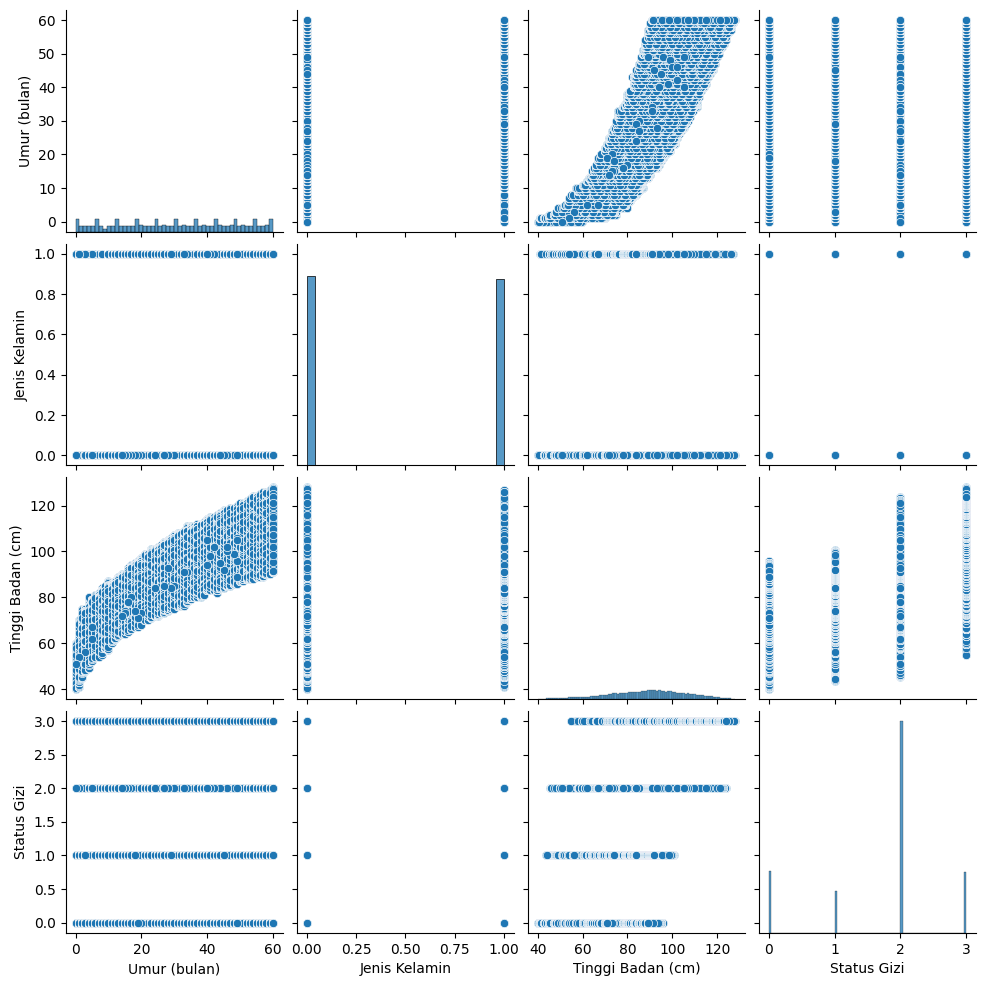

In [ ]:
sns.pairplot(df_merged)
plt.show()

# Pembuatan Model

In [ ]:
X = df_merged[['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']]
y = df_merged['Status Gizi']

X_lapangan = data_posyandu_rambutan[['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']]
y_lapangan = data_posyandu_rambutan["Status Gizi"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Merubah nilai X ke scaller ➗

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_lapangan = scaler.transform(X_lapangan)

scaler_params = {
    'mean': scaler.mean_.tolist(),
    'scale': scaler.scale_.tolist()
}

with open(f'{root_dir}/scaler_params.json', 'w') as json_file:
    json.dump(scaler_params, json_file)

In [ ]:
HP_BATCH_SIZE = hp.HParam('batch_size', hp.Discrete([32, 64]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

histories = {}

with tf.summary.create_file_writer(f'{root_dir}/logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_BATCH_SIZE, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(dir, hparams, name, session_num):
  if hparams[HP_OPTIMIZER] == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
  elif hparams[HP_OPTIMIZER] == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

  model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
  ])

  model.compile(
      optimizer=optimizer,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001, verbose=1)

  history = model.fit(
        X_train,
        y_train,
        epochs=50,
        batch_size=batch_size,
        validation_split=0.1,
        validation_data=(X_val, y_val),
        callbacks=[
            early_stopping,
            hp.KerasCallback(dir, hparams, trial_id=name)
            ])

  model_h5_name = f'model_batch{hparams[HP_BATCH_SIZE]}_dropout{hparams[HP_DROPOUT]}_{hparams[HP_OPTIMIZER]}.h5'

  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Loss: {loss}')
  print(f'Accuracy: {accuracy}')
  model.save(os.path.join(f'/content/{root_dir}/models', model_h5_name))
  histories[f'model-{session_num}'] = pd.DataFrame(history.history)
  return accuracy, model_h5_name

In [ ]:
hyperparams_eval_real_data = pd.DataFrame(columns=['session_name', 'model_h5_file', HP_BATCH_SIZE.name, HP_DROPOUT.name, HP_OPTIMIZER.name, 'accuracy'])

def run(dir, hparams, name, session_num):
  with tf.summary.create_file_writer(dir).as_default():
    hp.hparams(hparams)
    accuracy, model_h5_name = train_test_model(dir, hparams, name, session_num)

    hyperparams_eval_real_data.loc[session_num - 1] = {
        'session_name': f'model-{session_num}',
        'model_h5_file': model_h5_name,
        HP_BATCH_SIZE.name: hparams[HP_BATCH_SIZE],
        HP_DROPOUT.name: hparams[HP_DROPOUT],
        HP_OPTIMIZER.name: hparams[HP_OPTIMIZER],
        'accuracy': accuracy
    }

    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 1

for batch_size in HP_BATCH_SIZE.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_BATCH_SIZE: batch_size,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run_"+str(session_num)
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run(f'{root_dir}/logs/hparam_tuning/' + run_name, hparams, run_name, session_num)
      session_num += 1

--- Starting trial: run_1
{'batch_size': 32, 'dropout': 0.2, 'optimizer': 'adam'}
Epoch 1/50
3011/3011 [==============================] - 13s 4ms/step - loss: 1.0627 - accuracy: 0.5698 - val_loss: 0.7919 - val_accuracy: 0.6592
Epoch 2/50
3011/3011 [==============================] - 9s 3ms/step - loss: 0.7071 - accuracy: 0.6989 - val_loss: 0.4933 - val_accuracy: 0.8445
Epoch 3/50
3011/3011 [==============================] - 14s 5ms/step - loss: 0.5497 - accuracy: 0.7695 - val_loss: 0.3831 - val_accuracy: 0.8958
Epoch 4/50
3011/3011 [==============================] - 11s 4ms/step - loss: 0.4718 - accuracy: 0.8065 - val_loss: 0.3200 - val_accuracy: 0.9176
Epoch 5/50
3011/3011 [==============================] - 11s 4ms/step - loss: 0.4261 - accuracy: 0.8279 - val_loss: 0.2810 - val_accuracy: 0.9268
Epoch 6/50
3011/3011 [==============================] - 10s 3ms/step - loss: 0.3949 - accuracy: 0.8398 - val_loss: 0.2538 - val_accuracy: 0.9311
Epoch 7/50
3011/3011 [===========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
3011/3011 [==============================] - 12s 4ms/step - loss: 1.3720 - accuracy: 0.2839 - val_loss: 1.3237 - val_accuracy: 0.4210
Epoch 2/50
3011/3011 [==============================] - 9s 3ms/step - loss: 1.3055 - accuracy: 0.4554 - val_loss: 1.2700 - val_accuracy: 0.5237
Epoch 3/50
3011/3011 [==============================] - 10s 3ms/step - loss: 1.2562 - accuracy: 0.5351 - val_loss: 1.2301 - val_accuracy: 0.5581
Epoch 4/50
3011/3011 [==============================] - 10s 3ms/step - loss: 1.2199 - accuracy: 0.5529 - val_loss: 1.2005 - val_accuracy: 0.5581
Epoch 5/50
3011/3011 [==============================] - 8s 3ms/step - loss: 1.1932 - accuracy: 0.5581 - val_loss: 1.1791 - val_accuracy: 0.5581
Epoch 6/50
3011/3011 [==============================] - 9s 3ms/step - loss: 1.1756 - accuracy: 0.5611 - val_loss: 1.1639 - val_accuracy: 0.5581
Epoch 7/50
3011/3011 [==============================] - 8s 3ms/step - loss: 1.1623 - accuracy: 0.5616 - val_loss: 1.1531 - val_accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
3011/3011 [==============================] - 11s 3ms/step - loss: 1.2310 - accuracy: 0.5219 - val_loss: 1.0918 - val_accuracy: 0.5581
Epoch 2/50
3011/3011 [==============================] - 9s 3ms/step - loss: 1.0405 - accuracy: 0.5699 - val_loss: 0.8161 - val_accuracy: 0.5911
Epoch 3/50
3011/3011 [==============================] - 11s 4ms/step - loss: 0.8406 - accuracy: 0.6336 - val_loss: 0.6679 - val_accuracy: 0.7077
Epoch 4/50
3011/3011 [==============================] - 11s 4ms/step - loss: 0.7512 - accuracy: 0.6680 - val_loss: 0.6003 - val_accuracy: 0.7089
Epoch 5/50
3011/3011 [==============================] - 9s 3ms/step - loss: 0.6883 - accuracy: 0.6958 - val_loss: 0.5495 - val_accuracy: 0.7182
Epoch 6/50
3011/3011 [==============================] - 11s 4ms/step - loss: 0.6441 - accuracy: 0.7142 - val_loss: 0.5032 - val_accuracy: 0.7688
Epoch 7/50
3011/3011 [==============================] - 10s 3ms/step - loss: 0.6092 - accuracy: 0.7285 - val_loss: 0.4750 - val_accu

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
3011/3011 [==============================] - 8s 2ms/step - loss: 1.3638 - accuracy: 0.4282 - val_loss: 1.3077 - val_accuracy: 0.5661
Epoch 2/50
3011/3011 [==============================] - 10s 3ms/step - loss: 1.3128 - accuracy: 0.5064 - val_loss: 1.2711 - val_accuracy: 0.5587
Epoch 3/50
3011/3011 [==============================] - 8s 3ms/step - loss: 1.2812 - accuracy: 0.5382 - val_loss: 1.2428 - val_accuracy: 0.5581
Epoch 4/50
3011/3011 [==============================] - 9s 3ms/step - loss: 1.2564 - accuracy: 0.5491 - val_loss: 1.2203 - val_accuracy: 0.5581
Epoch 5/50
3011/3011 [==============================] - 10s 3ms/step - loss: 1.2373 - accuracy: 0.5549 - val_loss: 1.2023 - val_accuracy: 0.5581
Epoch 6/50
3011/3011 [==============================] - 7s 2ms/step - loss: 1.2192 - accuracy: 0.5591 - val_loss: 1.1874 - val_accuracy: 0.5581
Epoch 7/50
3011/3011 [==============================] - 10s 3ms/step - loss: 1.2087 - accuracy: 0.5596 - val_loss: 1.1754 - val_accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1506/1506 [==============================] - 6s 3ms/step - loss: 1.2005 - accuracy: 0.5364 - val_loss: 1.0860 - val_accuracy: 0.5581
Epoch 2/50
1506/1506 [==============================] - 4s 3ms/step - loss: 0.9705 - accuracy: 0.6159 - val_loss: 0.7418 - val_accuracy: 0.7073
Epoch 3/50
1506/1506 [==============================] - 7s 4ms/step - loss: 0.7430 - accuracy: 0.6911 - val_loss: 0.5774 - val_accuracy: 0.7224
Epoch 4/50
1506/1506 [==============================] - 5s 3ms/step - loss: 0.6256 - accuracy: 0.7377 - val_loss: 0.4641 - val_accuracy: 0.8342
Epoch 5/50
1506/1506 [==============================] - 4s 3ms/step - loss: 0.5465 - accuracy: 0.7714 - val_loss: 0.3806 - val_accuracy: 0.8889
Epoch 6/50
1506/1506 [==============================] - 6s 4ms/step - loss: 0.4901 - accuracy: 0.7948 - val_loss: 0.3316 - val_accuracy: 0.9075
Epoch 7/50
1506/1506 [==============================] - 4s 3ms/step - loss: 0.4522 - accuracy: 0.8111 - val_loss: 0.3010 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1506/1506 [==============================] - 9s 5ms/step - loss: 1.3461 - accuracy: 0.4181 - val_loss: 1.3346 - val_accuracy: 0.4726
Epoch 2/50
1506/1506 [==============================] - 5s 3ms/step - loss: 1.3221 - accuracy: 0.4981 - val_loss: 1.3131 - val_accuracy: 0.5575
Epoch 3/50
1506/1506 [==============================] - 8s 5ms/step - loss: 1.3016 - accuracy: 0.5417 - val_loss: 1.2936 - val_accuracy: 0.5581
Epoch 4/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.2814 - accuracy: 0.5546 - val_loss: 1.2759 - val_accuracy: 0.5581
Epoch 5/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.2649 - accuracy: 0.5584 - val_loss: 1.2601 - val_accuracy: 0.5581
Epoch 6/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.2494 - accuracy: 0.5605 - val_loss: 1.2458 - val_accuracy: 0.5581
Epoch 7/50
1506/1506 [==============================] - 5s 3ms/step - loss: 1.2363 - accuracy: 0.5612 - val_loss: 1.2330 - val_accuracy: 0.5581
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1506/1506 [==============================] - 10s 6ms/step - loss: 1.2485 - accuracy: 0.5006 - val_loss: 1.1324 - val_accuracy: 0.5581
Epoch 2/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.1294 - accuracy: 0.5630 - val_loss: 1.0309 - val_accuracy: 0.5581
Epoch 3/50
1506/1506 [==============================] - 7s 5ms/step - loss: 1.0078 - accuracy: 0.5901 - val_loss: 0.8262 - val_accuracy: 0.6881
Epoch 4/50
1506/1506 [==============================] - 6s 4ms/step - loss: 0.8697 - accuracy: 0.6330 - val_loss: 0.6982 - val_accuracy: 0.7024
Epoch 5/50
1506/1506 [==============================] - 7s 4ms/step - loss: 0.7806 - accuracy: 0.6621 - val_loss: 0.6205 - val_accuracy: 0.7077
Epoch 6/50
1506/1506 [==============================] - 7s 5ms/step - loss: 0.7236 - accuracy: 0.6850 - val_loss: 0.5696 - val_accuracy: 0.7266
Epoch 7/50
1506/1506 [==============================] - 6s 4ms/step - loss: 0.6843 - accuracy: 0.7012 - val_loss: 0.5328 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
1506/1506 [==============================] - 8s 5ms/step - loss: 1.3388 - accuracy: 0.4069 - val_loss: 1.3335 - val_accuracy: 0.5094
Epoch 2/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.3076 - accuracy: 0.4855 - val_loss: 1.3047 - val_accuracy: 0.5581
Epoch 3/50
1506/1506 [==============================] - 7s 5ms/step - loss: 1.2845 - accuracy: 0.5254 - val_loss: 1.2815 - val_accuracy: 0.5581
Epoch 4/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.2659 - accuracy: 0.5452 - val_loss: 1.2626 - val_accuracy: 0.5581
Epoch 5/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.2516 - accuracy: 0.5540 - val_loss: 1.2471 - val_accuracy: 0.5581
Epoch 6/50
1506/1506 [==============================] - 7s 4ms/step - loss: 1.2398 - accuracy: 0.5584 - val_loss: 1.2345 - val_accuracy: 0.5581
Epoch 7/50
1506/1506 [==============================] - 6s 4ms/step - loss: 1.2314 - accuracy: 0.5599 - val_loss: 1.2240 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
hyperparams_eval_real_data

,session_name,model_h5_file,batch_size,dropout,optimizer,accuracy
0,model-1,model_batch32_dropout0.2_adam.h5,32,0.2,adam,0.982726
1,model-2,model_batch32_dropout0.2_sgd.h5,32,0.2,sgd,0.682086
2,model-3,model_batch32_dropout0.5_adam.h5,32,0.5,adam,0.895773
3,model-4,model_batch32_dropout0.5_sgd.h5,32,0.5,sgd,0.558093
4,model-5,model_batch64_dropout0.2_adam.h5,64,0.2,adam,0.956565
5,model-6,model_batch64_dropout0.2_sgd.h5,64,0.2,sgd,0.558093
6,model-7,model_batch64_dropout0.5_adam.h5,64,0.5,adam,0.952413
7,model-8,model_batch64_dropout0.5_sgd.h5,64,0.5,sgd,0.558093


In [ ]:
for key, hisotry in histories.items():
  hisotry.to_excel(f'/content/{root_dir}/histories/history_{key}.xlsx', index=False)

In [ ]:
for index, row in hyperparams_eval_real_data.iterrows():
    model = load_model(f"/content/{root_dir}/models/{row['model_h5_file']}")
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    hyperparams_eval_real_data.at[index, 'accuracy'] = accuracy

best_model_row = hyperparams_eval_real_data.loc[hyperparams_eval_real_data['accuracy'].idxmax()]

print("Model dengan akurasi tertinggi:")
print(best_model_row)

377/377 [==============================] - 1s 2ms/step
Model dengan akurasi tertinggi:
session_name                              model-1
model_h5_file    model_batch32_dropout0.2_adam.h5
batch_size                                     32
dropout                                       0.2
optimizer                                    adam
accuracy                                 0.982726
Name: 0, dtype: object


In [ ]:
histories[best_model_row["session_name"]]

,loss,accuracy,val_loss,val_accuracy
0,1.062711,0.569834,0.791853,0.659248
1,0.707064,0.698935,0.493316,0.844531
2,0.549731,0.769517,0.383117,0.895773
3,0.471791,0.806484,0.319981,0.917615
4,0.426098,0.827932,0.280994,0.926833
5,0.394933,0.839808,0.253797,0.931069
6,0.368395,0.850698,0.227534,0.940703
7,0.341111,0.864027,0.208568,0.942114
8,0.323641,0.869674,0.193769,0.946682
9,0.307914,0.874533,0.182246,0.945353


In [ ]:
best_model_history = histories[best_model_row["session_name"]]

In [ ]:
def plot_loss_and_accuracy(history):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(history['loss'], color=color, label='Training Loss')
    ax1.plot(history['val_loss'], color=color, linestyle='--', label='Validation Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(history['accuracy'], color=color, label='Training Accuracy')
    ax2.plot(history['val_accuracy'], color=color, linestyle='--', label='Validation Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Training Metrics')
    plt.legend()
    plt.show()

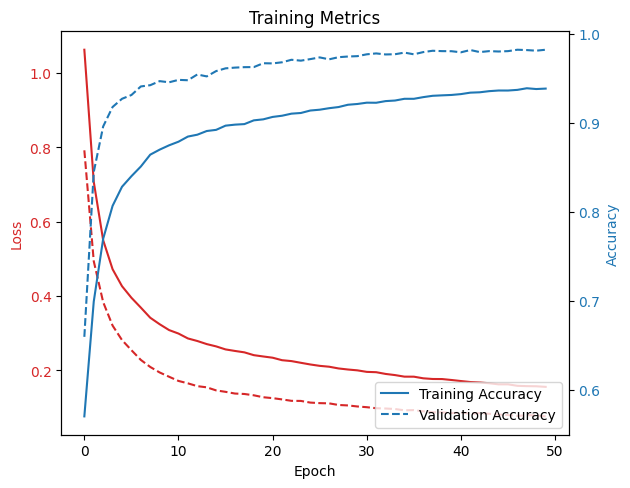

In [ ]:
plot_loss_and_accuracy(best_model_history)

In [ ]:
def calculate_percentage_difference(value1, value2):
    percentage_difference = abs((value1 - value2) / value1) * 100
    return percentage_difference

In [ ]:
akurasi_pelatihan = best_model_history['accuracy'].iloc[-1]
akurasi_validasi = best_model_history['val_accuracy'].iloc[-1]

persentase_perbedaan = calculate_percentage_difference(akurasi_pelatihan, akurasi_validasi)
print("Persentase Perbedaan:", persentase_perbedaan)

Persentase Perbedaan: 4.6556897220702576


In [ ]:
def calculate_percentage_difference(training_loss, validation_loss):
    difference = abs(training_loss - validation_loss)
    percentage_difference = (difference / validation_loss) * 100
    return percentage_difference

In [ ]:
loss_pelatihan = best_model_history['loss'].iloc[-1]
loss_validasi = best_model_history['val_loss'].iloc[-1]

persentase_perbedaan = calculate_percentage_difference(loss_pelatihan, loss_validasi)
print("Persentase Perbedaan Loss:", persentase_perbedaan)

Persentase Perbedaan Loss: 105.31464835248012


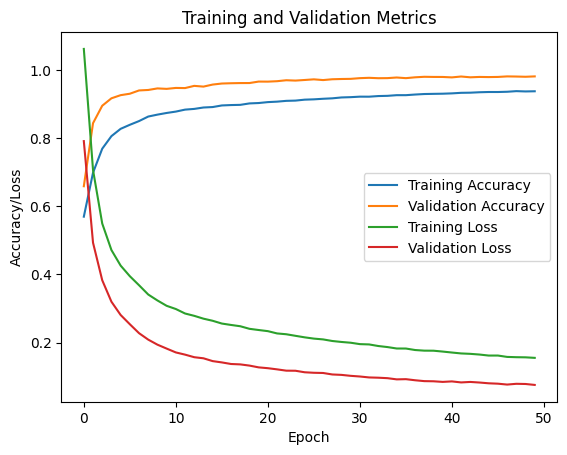

In [ ]:
plt.plot(best_model_history['accuracy'], label='Training Accuracy')
plt.plot(best_model_history['val_accuracy'], label='Validation Accuracy')
plt.plot(best_model_history['loss'], label='Training Loss')
plt.plot(best_model_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [ ]:
best_model_history.to_excel(f'/content/{root_dir}/best_model_history.xlsx', index=False)

In [ ]:
best_model = load_model(f"/content/{root_dir}/models/{best_model_row['model_h5_file']}")

In [ ]:
hyperparams_eval_real_data.to_excel(f'/content/{root_dir}/hyperparams_eval_real_data.xlsx', index=False)

In [ ]:
best_model_row = hyperparams_eval_real_data.loc[hyperparams_eval_real_data['accuracy'].idxmax()]

best_model_path = best_model_row['model_h5_file']
best_accuracy = best_model_row['accuracy']
best_session_num = best_model_row['session_name']

print("Model terbaik:", best_model_path)
print("Akurasi model terbaik:", best_accuracy)
print("Nomor sesi model terbaik:", best_session_num)

Model terbaik: model_batch32_dropout0.2_adam.h5
Akurasi model terbaik: 0.9827256872352794
Nomor sesi model terbaik: model-1


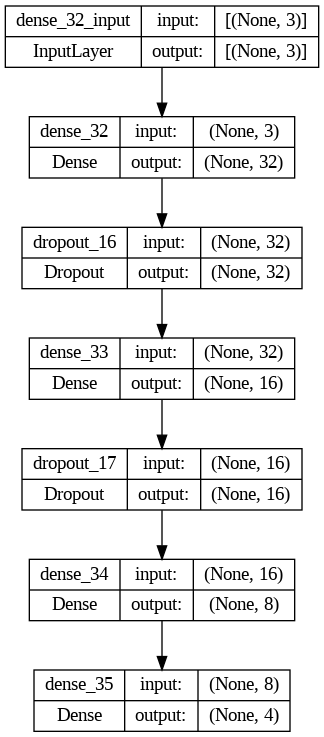

In [ ]:
plot_model(best_model, to_file=f'/content/{root_dir}/model.png', show_shapes=True, show_layer_names=True)

In [ ]:
best_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                128       
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 4)                 36        
                                                                 
Total params: 828 (3.23 KB)
Trainable params: 828 (3.2

In [ ]:
@tf.autograph.experimental.do_not_convert
def predict_function(*args, **kwargs):
    return best_model.predict(*args, **kwargs)

y_pred_proba = predict_function(X_lapangan)
y_pred = np.argmax(y_pred_proba, axis=1)

2/2 [==============================] - 0s 8ms/step


In [ ]:
accuracy = accuracy_score(y_lapangan, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

Akurasi: 100.00%


In [ ]:
report_str = classification_report(y_lapangan, y_pred, output_dict=True)

In [ ]:
print("Laporan Klasifikasi:\n", report_str)
print("Matriks Kebingungan:\n", confusion_matrix(y_lapangan, y_pred))

Laporan Klasifikasi:
 {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37}}
Matriks Kebingungan:
 [[ 3  0  0]
 [ 0  4  0]
 [ 0  0 30]]


In [ ]:
report_df = pd.DataFrame(report_str).transpose()
report_df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,3.0
1,1.0,1.0,1.0,4.0
2,1.0,1.0,1.0,30.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,37.0
weighted avg,1.0,1.0,1.0,37.0


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 554.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch32_dropout0.2_adam.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch32_dropout02_adam"'

subprocess.run(command, shell=True)

CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch32_dropout0.2_adam.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch32_dropout02_adam"', returncode=0)

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch32_dropout0.2_sgd.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch32_dropout02_sgd"'

subprocess.run(command, shell=True)

CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch32_dropout0.2_sgd.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch32_dropout02_sgd"', returncode=0)

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch32_dropout0.5_adam.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch32_dropout05_adam"'

subprocess.run(command, shell=True)

CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch32_dropout0.5_adam.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch32_dropout05_adam"', returncode=0)

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch32_dropout0.5_sgd.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch32_dropout05_sgd"'

subprocess.run(command, shell=True)

CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch32_dropout0.5_sgd.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch32_dropout05_sgd"', returncode=0)

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch64_dropout0.2_adam.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch64_dropout02_adam"'

subprocess.run(command, shell=True)

CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch64_dropout0.2_adam.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch64_dropout02_adam"', returncode=0)

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch64_dropout0.2_sgd.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch64_dropout02_sgd"'

subprocess.run(command, shell=True)


CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch64_dropout0.2_sgd.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch64_dropout02_sgd"', returncode=0)

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch64_dropout0.5_adam.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch64_dropout05_adam"'

subprocess.run(command, shell=True)

CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch64_dropout0.5_adam.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch64_dropout05_adam"', returncode=0)

In [ ]:
command = f'tensorflowjs_converter --input_format keras \
                       "/content/{root_dir}/models/model_batch64_dropout0.5_sgd.h5" \
                       "/content/{root_dir}/tfjs_models/model_batch64_dropout05_sgd"'

subprocess.run(command, shell=True)

CompletedProcess(args='tensorflowjs_converter --input_format keras                        "/content/bahan_skripsi_20240627-071830/models/model_batch64_dropout0.5_sgd.h5"                        "/content/bahan_skripsi_20240627-071830/tfjs_models/model_batch64_dropout05_sgd"', returncode=0)

In [ ]:
command = f'zip -r "{root_dir}.zip" "/content/{root_dir}"'

subprocess.run(command, shell=True)

CompletedProcess(args='zip -r "bahan_skripsi_20240627-071830.zip" "/content/bahan_skripsi_20240627-071830"', returncode=0)